In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [228]:
data = pd.read_csv("data/data.csv", index_col=0)
labels = pd.read_csv("data/labels.csv", index_col=0)

In [233]:
mean_arr = np.mean(data, 0)
var_arr = np.var(data, 0)
data_new = data.drop(data.columns[np.argwhere(np.array(var_arr == 0)).flatten()], axis = 1)

In [234]:
from sklearn.feature_selection import SelectKBest 
labels_final = np.array(labels).ravel()
data_final = SelectKBest(k = 200).fit_transform(data_new, labels_final)

In [235]:
types = []
num_types = []
for label in labels_final:
    if label not in types:
        types.append(label)
        num_types.append(0)
    
    num_types[types.index(label)] += 1
print(num_types)

[136, 141, 300, 146, 78]


In [524]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

Cs = np.logspace(-4, 4, 30)
clf = LogisticRegressionCV(Cs = Cs,
                           random_state=0, 
                           penalty = 'l1',
                           solver = 'liblinear', 
                           intercept_scaling=10000, 
                           multi_class='ovr',
                           scoring = "neg_log_loss").fit(data_final, labels_final)

Chosen C is 0.73.


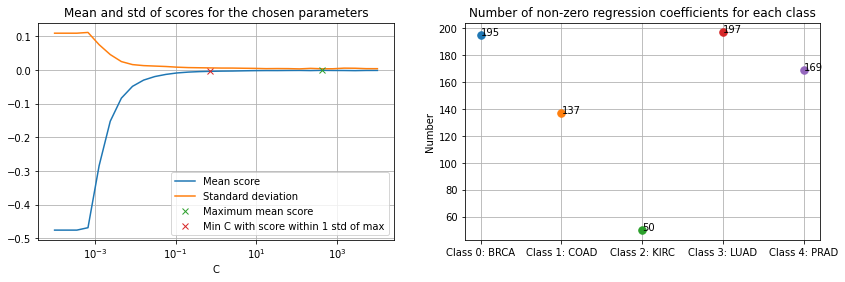

In [569]:
scores = []

for key in clf.scores_.keys():   
    scores.append(clf.scores_[key])
    
scores = np.array(scores).reshape((25,30))
mean_scores = np.mean(scores, 0)
std_scores = np.std(scores, 0)

max_score = np.max(mean_scores)
index_of_max_score = np.argmax(mean_scores)
std_of_max_score = std_scores[index_of_max_score]

index = np.argwhere(mean_scores >= max_score - std_of_max_score)[0]
C = Cs[index][0]

print("Chosen C is %.2f." % C)


plt.figure(figsize = (14,4))

plt.subplot(1,2,1)

plt.semilogx(Cs, mean_scores)
plt.semilogx(Cs, std_scores)
plt.semilogx(Cs[index_of_max_score], mean_scores[index_of_max_score], 'x')
plt.semilogx(Cs[index], mean_scores[index], 'x')
plt.legend(['Mean score', 'Standard deviation', 'Maximum mean score', 'Min C with score within 1 std of max'])
plt.xlabel('C')
plt.title('Mean and std of scores for the chosen parameters')
plt.grid()


# plt.semilogx(betas, std_scores)
# plt.show()
non_zero_coeff = clf.coef_ != 0
test = np.argwhere(freq)
top_features = np.sort(np.argsort(non_zero_coeff)[:, -5:])

plt.subplot(1,2,2)

for i in range(5):
    plt.plot(i, np.sum(non_zero_coeff[i]), '.', markersize = 15)
    plt.text(i, np.sum(non_zero_coeff[i]), np.sum(non_zero_coeff[i]))

ax = plt.gca()
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(["Class %d: %s" % (i, list(clf.scores_.keys())[i]) for i in range(5)])
plt.ylabel('Number')
plt.title('Number of non-zero regression coefficients for each class')
plt.grid()
plt.show()


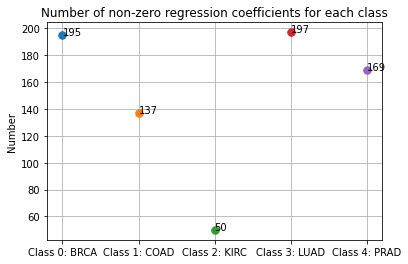

In [527]:
from sklearn.linear_model import LogisticRegression

n_runs = 200
freq_1 = np.zeros((5,200))

for i in range(n_runs):
    print("Run %d of %d." % (i+1, n_runs), end = '\r')
    clf_1 = LogisticRegression(C = C,
                               random_state = i,
                               penalty = 'l1',
                               solver = 'liblinear', 
                               intercept_scaling=10000, 
                               multi_class='ovr').fit(data_final, labels_final)
    freq_1 += clf_1.coef_ != 0
freq_1 = freq/n_runs

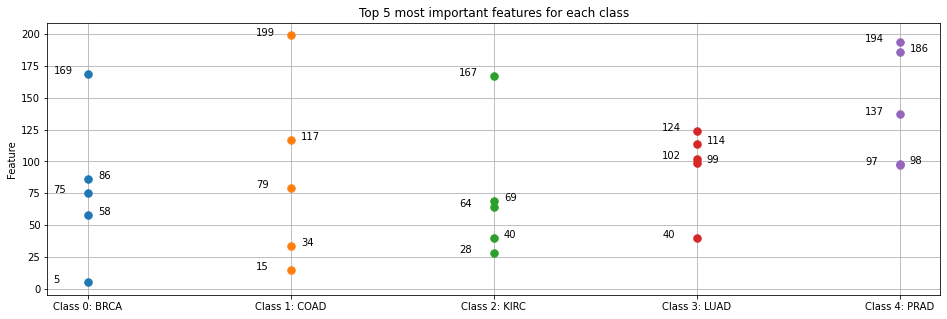

In [529]:
top_features = np.sort(np.argsort(freq_1)[:, -5:])
masked_abs = np.abs(data_final).mean(0)*(freq_1 == 1)

top_features = np.sort(np.argsort(masked_abs)[:, -5:])


plt.figure(figsize = (16,5))

for i in range(5):
    plt.plot([i]*5, top_features[i,:], '.', markersize = 15)
    for j in range(5):
        if (j%2):
            plt.text(i+0.05, top_features[i,j], top_features[i,j])
        else:
            plt.text(i-0.17, top_features[i,j], top_features[i,j])

ax = plt.gca()
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(["Class %d: %s" % (i, list(clf.scores_.keys())[i]) for i in range(5)])
plt.ylabel('Feature')
plt.title('Top 5 most important features for each class')
plt.grid()
plt.show()


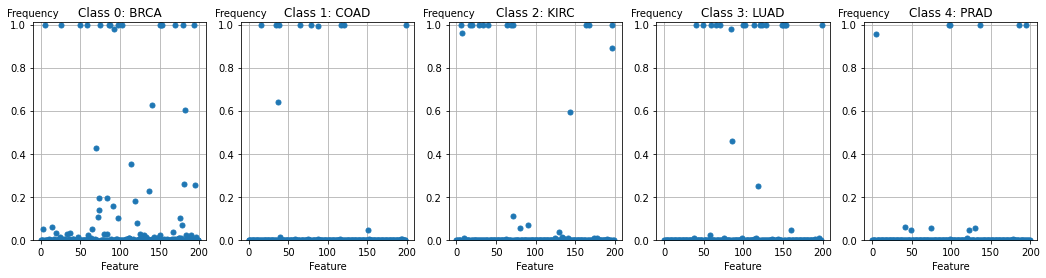

In [530]:
plt.figure(figsize = (18,4))
plt.rc('font', size=10) #controls default text size

for i in range(5):
    ax = plt.subplot(1,5,i+1)
    plt.plot(freq_1[i,:],'.', markersize = 10)
    plt.ylim([0, 1.01])
    plt.title("Class %d: %s" % (i,list(clf.scores_.keys())[i]))
    plt.xlabel('Feature')
    plt.ylabel('Frequency',rotation=0)
    ax.yaxis.set_label_coords(0,1.02)
    plt.grid()


plt.show()


In [546]:
clf

(5, 200)